## load libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
from matplotlib import gridspec

import math
import glob
import os

from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [2]:
import matplotlib
matplotlib.get_backend()

display(matplotlib.rcParams)

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

## load excel file

In [3]:
file_Name = "18Sept19.xls"
file_Path = "/Users/quinnvinlove/Documents/sugarsBio/excel/"

df = pd.read_excel(file_Path + file_Name)

In [4]:
df[df.Component.isin(['Nonadecane'])]

,Row,Identifier 1,Identifier 2,Rt,Component,d 13C/12C,Ampl 44,BGD 44,Width,Notes
25,2,AA std,1,1311.1,Nonadecane,-23.837,5206,35.3,13.4,NaN
59,3,SB83 T2 S,1,1311.9,Nonadecane,-23.963,4602,34.7,11.9,NaN
97,4,SB83 T2 S,2,1312.1,Nonadecane,-24.122,4523,35.0,11.7,NaN
136,5,SB83 T2 S,3,1312.7,Nonadecane,-24.078,4579,34.8,11.7,NaN
177,6,AA std,2,1312.3,Nonadecane,-23.840,5322,37.2,13.4,NaN
210,7,SB44 T2 S,1,1311.9,Nonadecane,-23.906,3283,26.4,11.9,NaN
245,8,SB44 T2 S,2,1311.7,Nonadecane,-23.922,3331,26.6,11.7,NaN
282,9,SB44 T2 S,3,1311.7,Nonadecane,-23.931,3922,28.8,12.1,NaN
322,10,AA std,3,1311.1,Nonadecane,-23.838,5446,37.6,13.4,NaN
358,11,SB70 T2 S,1,1312.5,Nonadecane,-23.959,4197,35.6,11.7,NaN


## format data into more easily processable shape

In [5]:
def generateChem(df):
    aa = df[['Row', 'Component', 'd 13C/12C']]
    aa = aa.drop(aa[aa['Component'] == 'Blank'].index)
    
    aa = aa.drop(aa[pd.isna(aa['Component'])].index)

    out = aa.pivot(index='Row', columns='Component', values='d 13C/12C').bfill().iloc[[0],:]
    out.insert(0, 'Identifier 1', df['Identifier 1'].unique())
    out.insert(1, 'Identifier 2', df['Identifier 2'].unique())

    out.columns.name = None

    return out

In [6]:
_all = pd.concat([generateChem(df2) for _, df2 in df.groupby(['Identifier 1', 'Identifier 2'])])
_all = _all.sort_index()

In [7]:
_all

,Identifier 1,Identifier 2,Ala,Asp,Asp1,CO2-1,CO2-2,CO2-3,CO2-4,CO2-5,...,Nonadecane,Phe,Pro,Ser,Ser1,Thr,Tyr,Val,nLeu,Phe1
Row,,,,,,,,,,,,,,,,,,,,,
2,AA std,1,-25.866,-29.819,-30.194,-25.145,-25.22,-25.22,-25.253,-25.270,...,-23.837,-15.957,-19.453,-27.333,-27.779,-25.045,-26.497,-19.433,-30.103,NaN
3,SB83 T2 S,1,-25.675,-24.803,NaN,-25.120,-25.22,-25.22,-25.237,-25.254,...,-23.963,-25.732,-21.237,-25.410,NaN,-21.341,-27.192,-27.508,-29.922,-25.620
4,SB83 T2 S,2,-25.752,-24.798,NaN,-25.132,-25.22,-25.22,-25.249,-25.274,...,-24.122,-25.734,-21.354,-25.289,NaN,-21.311,-27.214,-27.585,-29.803,-25.630
5,SB83 T2 S,3,-25.688,-24.801,NaN,-25.135,-25.22,-25.22,-25.247,-25.277,...,-24.078,-25.711,-21.141,-25.329,NaN,-21.241,-27.155,-27.641,-29.671,-25.677
6,AA std,2,-26.130,-29.718,-30.307,-25.156,-25.22,-25.22,-25.247,-25.260,...,-23.840,-15.886,-19.388,-27.258,-27.873,-24.974,-26.577,-19.641,-30.211,NaN
7,SB44 T2 S,1,-26.520,-24.885,NaN,-25.143,-25.22,-25.22,-25.242,-25.262,...,-23.906,-25.471,-21.308,-25.216,NaN,-21.484,-26.921,-27.683,-29.423,NaN
8,SB44 T2 S,2,-26.708,-24.990,NaN,-25.154,-25.22,-25.22,-25.234,-25.272,...,-23.922,-25.693,-21.280,-25.277,NaN,-21.517,-27.041,-27.674,-29.317,-25.599
9,SB44 T2 S,3,-26.672,-25.022,NaN,-25.138,-25.22,-25.22,-25.261,-25.259,...,-23.931,-25.756,-21.271,-25.387,NaN,-21.497,-27.125,-27.739,-29.426,-25.656
10,AA std,3,-26.275,-29.841,-30.404,-25.148,-25.22,-25.22,-25.251,-25.284,...,-23.838,-15.938,-19.414,-27.185,-27.901,-24.925,-26.548,-19.705,-29.979,NaN


In [14]:
incl = ['Ala', 'Asp']

alldat = _all[_all["Identifier 1"] == 'SB83 T2 S']
display(alldat['Identifier 1'].iloc[0])
display(alldat[incl])
display(alldat[incl].mean())
new = alldat[incl].mean()
new['Name'] = alldat['Identifier 1'].iloc[0]
display(new)

'SB83 T2 S'

,Ala,Asp
Row,,
3,-25.675,-24.803
4,-25.752,-24.798
5,-25.688,-24.801


Ala   -25.705000
Asp   -24.800667
dtype: float64

Ala       -25.705
Asp      -24.8007
Name    SB83 T2 S
dtype: object

## generate aa sheet

In [8]:
temp_aa = _all[_all['Identifier 1'] == 'AA std']
temp_aa = temp_aa.drop(['Identifier 1', 'Identifier 2'], axis=1)
aa_std = temp_aa.apply(np.std, axis=0)
aa_avg = temp_aa.apply(np.mean, axis=0)
aa = pd.concat([aa_std, aa_avg], axis=1, keys=['SD', 'mean'])
aa = aa.dropna()

In [9]:
aa

,SD,mean
Ala,2.701871e-01,-26.525714
Asp,8.843529e-02,-29.884357
Asp1,1.478520e-01,-30.411692
CO2-1,9.452351e-03,-25.148714
CO2-2,3.552714e-15,-25.220000
CO2-3,3.552714e-15,-25.220000
CO2-4,7.006193e-03,-25.250643
CO2-5,1.127576e-02,-25.269000
CO2-6,1.515852e-02,-25.215929
CO2-7,1.687287e-02,-25.066143


## generate is 'sheet'

In [10]:
temp_is = _all[['nLeu', 'Nonadecane', 'Caffeine']]
is_std = temp_is.apply(np.std, axis=0)
is_avg = temp_is.apply(np.mean, axis=0)
_is = pd.concat([is_std, is_avg], axis=1, keys=['SD', 'mean'])

In [11]:
_is

,SD,mean
nLeu,0.228552,-29.489208
Nonadecane,0.090341,-23.944642
Caffeine,0.146746,-29.110698


## generate check sheet

In [12]:
_all[_all['Identifier 1'] == 'Check S']

,Identifier 1,Identifier 2,Ala,Asp,Asp1,CO2-1,CO2-2,CO2-3,CO2-4,CO2-5,...,Nonadecane,Phe,Pro,Ser,Ser1,Thr,Tyr,Val,nLeu,Phe1
Row,,,,,,,,,,,,,,,,,,,,,
47,Check S,1,-26.828,-25.013,NaN,-25.143,-25.22,-25.22,-25.245,-25.269,...,-24.106,-25.943,-21.855,-25.572,NaN,-21.617,-27.153,-28.382,-29.393,-25.879
48,Check S,2,-26.964,-25.014,NaN,-25.135,-25.22,-25.22,-25.242,-25.282,...,-24.106,-25.959,-21.814,-25.589,NaN,-21.646,-27.250,-28.540,-29.407,-25.916
49,Check S,3,-27.064,-25.098,NaN,-25.144,-25.22,-25.22,-25.235,-25.281,...,-24.101,-25.908,-21.871,-25.688,NaN,-21.747,-27.321,-28.534,-29.409,-25.831


In [13]:
#generate time series for His
def plotTimeSeries(compound):
    def outliar(data):
        osd = np.std(data)
        om = np.mean(data)
        upper = om + (2*osd)
        lower = om - (2*osd)
        
        return upper, lower
    
    #draw subplots
    fig, (ax1, ax2) = plt.subplots(2, 1)
    
    #select data
    std = _all[_all['Identifier 1'] == 'AA std']
    other = _all[_all['Identifier 1'] != 'AA std']
    
    
    upper, lower = outliar(other[compound])
    test_color = ['yellow' if x > upper or x < lower else 'green' for x in other[compound]]
    
    upper, lower = outliar(std[compound])
    aa_color = ['yellow' if x > upper or x < lower else 'blue' for x in std[compound]]
    
    
    #draw scatter
    ax1.scatter(std.index, std[compound], c=aa_color)
    ax2.scatter(other.index, other[compound], c=test_color)
    
    #draw mean
    ax1.axhline(np.mean(std[compound]), color='black')
    ax2.axhline(np.mean(other[compound]), color='black')
    
    #set scatter ticks
    ax1.set_xticks(_all.index)
    ax2.set_xticks(_all.index)
    
    #set tick spacing
    tick_spacing = 2
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    #set title and show plot
    fig.suptitle("d 13C/12C for " + compound + "\n" + file_Name)
    plt.show()
    
    #draw subplots for histogram?
    
    
    return

## scatter overview

In [14]:
def outlier(data):
        osd = np.std(data)
        om = np.mean(data)
        upper = om + (2*osd)
        lower = om - (2*osd)
        
        return upper, lower

def plotCompoundTimeSeries(data, compound, primaryColor, secondaryColor, ax):
    work = data[compound]
     
    upper, lower = outlier(work)
    color = [secondaryColor if x > upper or x < lower else primaryColor for x in work]
    
    #draw scatter
    ax.scatter(data.index, work, c=color)
    
    #draw mean
    ax.axhline(np.mean(work), color='black')
    
    #set scatter ticks
    ax.set_xticks(_all.index)
    
    #set tick spacing
    tick_spacing = 5
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    return

def displayTrendLine(data, compound, color, ax3):
    work = data[compound]
    upper, lower = outlier(work)
    
    work = work[(work < upper) & (work > lower)]
    
    if len(work) < 2:
        return
    
    X = np.array(work.index).reshape(-1,1)
    
    y = np.array(work.values).reshape(-1, 1)
    
    pf = PolynomialFeatures(degree=2)
    X_poly = pf.fit_transform(X)

    clf = LinearRegression().fit(X_poly, y)
    

    model_range = _all.index
    model_range_transform = pf.transform(np.array(model_range).reshape(-1, 1))
    
    r2 = r2_score(y, clf.predict(X_poly))
    
    
    ax3.plot(model_range, clf.predict(model_range_transform), color=color)
    
    ax3.text(x=0.7, y=0.05, transform=ax3.transAxes, s="r^2=%0.3f" % r2)
   
    return

module

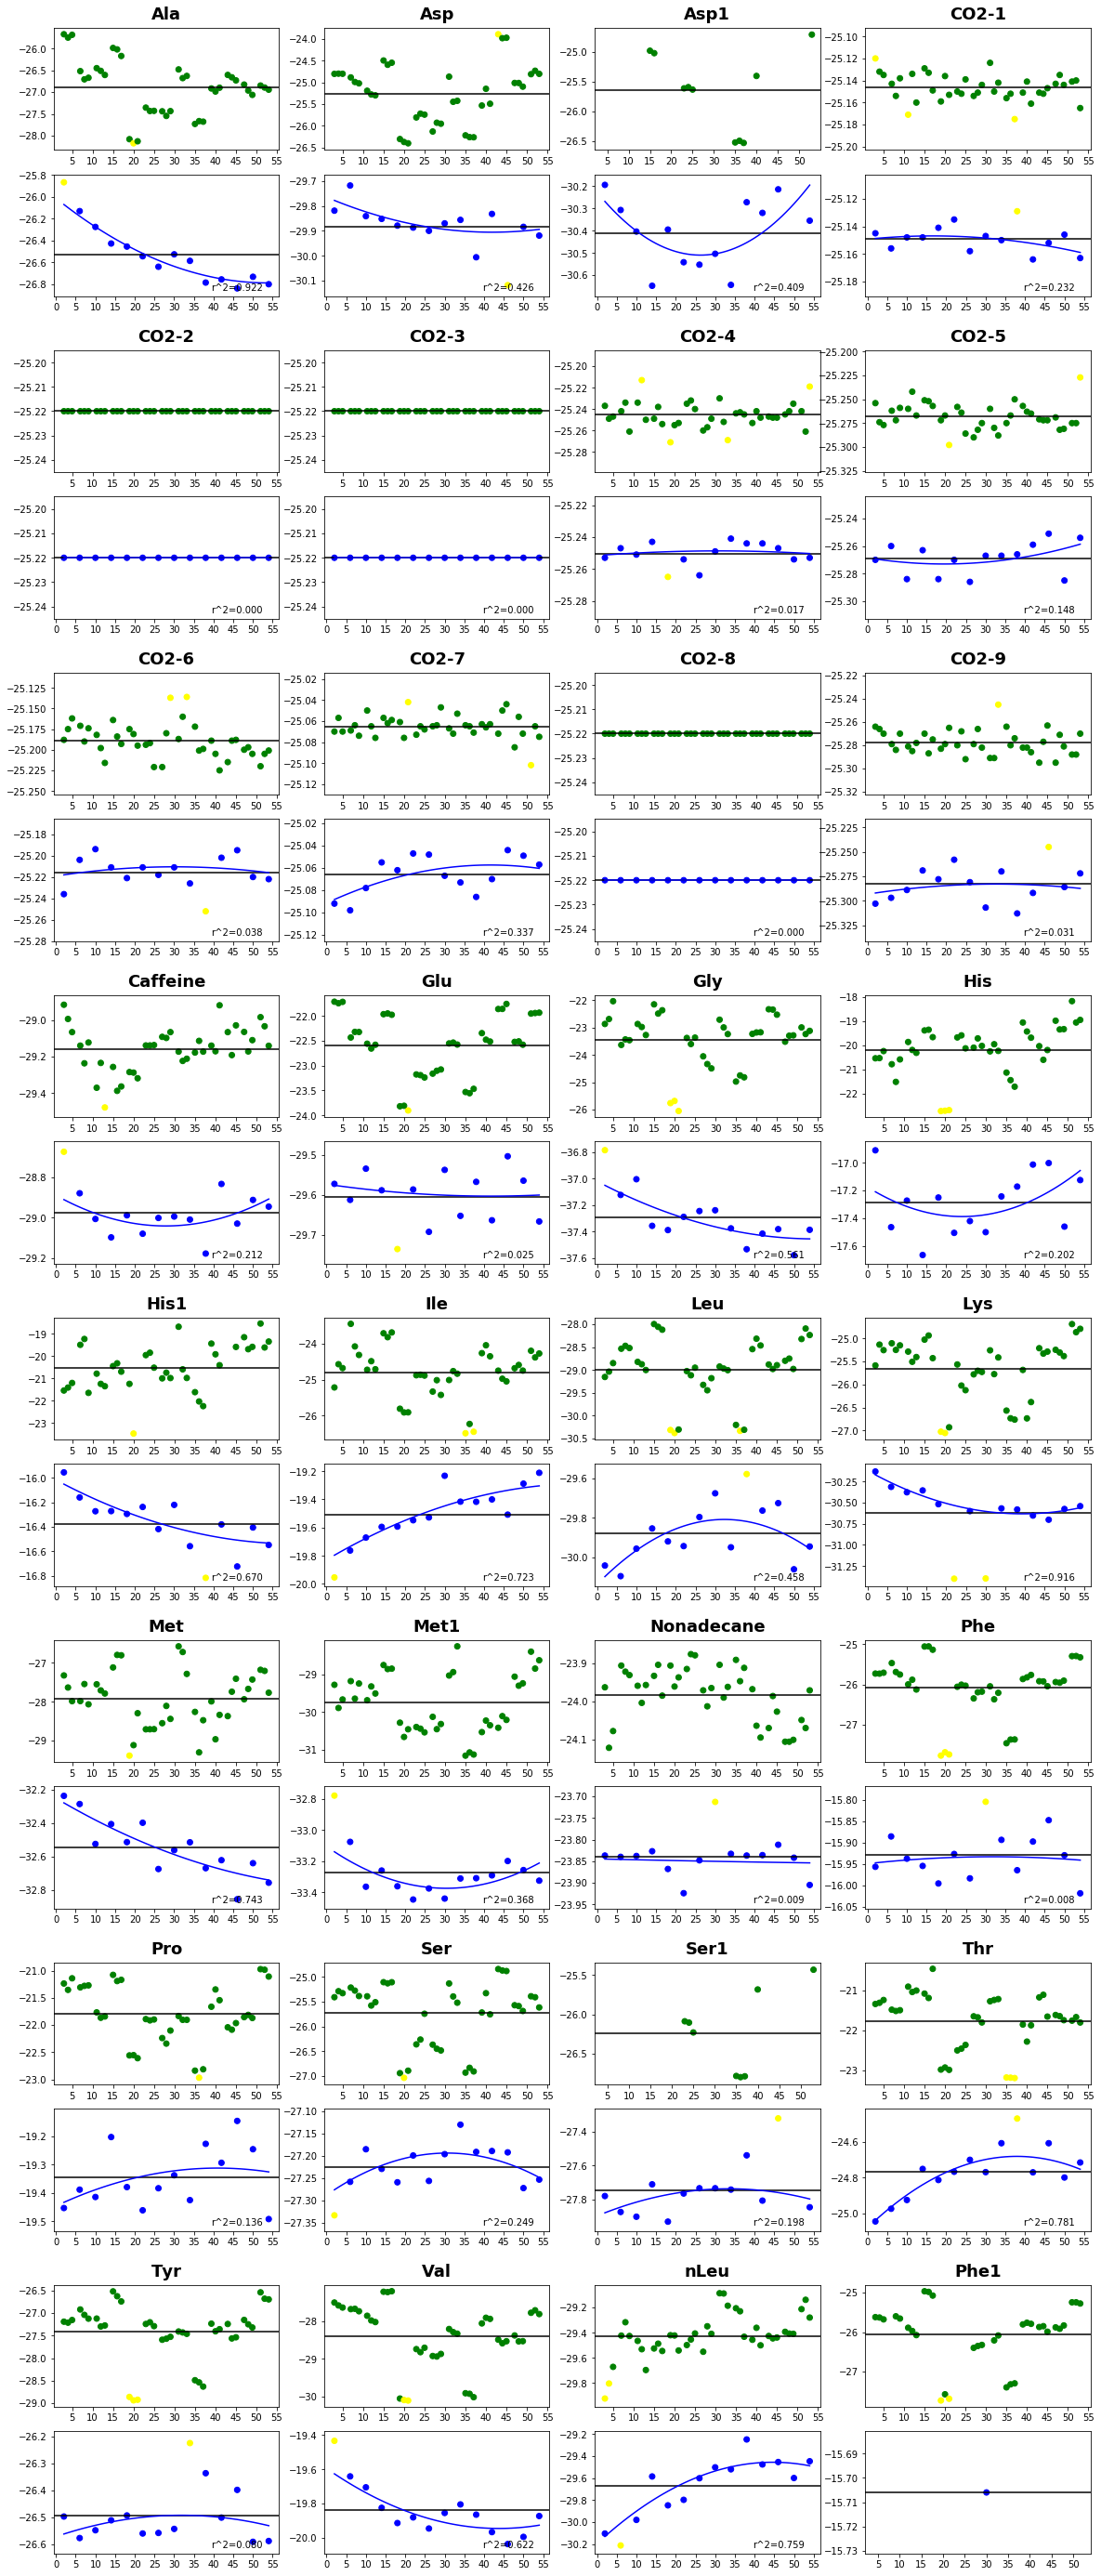

In [15]:
compounds = _all.drop(['Identifier 1', 'Identifier 2'], axis=1).columns

gW = 4
gH = math.ceil(len(compounds) / gW)

fig = plt.figure(figsize=(20, 50))

display(type(plt))

gs = gridspec.GridSpec(gH, gW) #32 samples, will have to fix later.

for idx, compound in enumerate(compounds):
    i = idx % gW
    j = math.floor(idx / gW)
    
    gsx = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[j, i])
    ax1 = fig.add_subplot(gsx[0, 0])
    ax2 = fig.add_subplot(gsx[1, 0])
    
    plotCompoundTimeSeries(_all[_all['Identifier 1'] != 'AA std'], compound, 'Green', 'Yellow', ax1)
    plotCompoundTimeSeries(_all[_all['Identifier 1'] == 'AA std'], compound, 'Blue', 'Yellow', ax2)
    
    displayTrendLine(_all[_all['Identifier 1'] == 'AA std'], compound, 'Blue', ax2)
    
    bbox = gs[j,i].get_position(figure=fig).get_points()
    xpos = (bbox[0][0] + bbox[1][0]) / 2
    
    t = fig.text(x=xpos, y=bbox[1][1] + 0.0025, s=str(compound), fontweight='bold', fontsize=18)
    
    r = fig.canvas.get_renderer()
    bb = t.get_window_extent(renderer=r)
    tt = fig.transFigure.inverted().transform((bb.width, bb.height))
    
    t.set_x(t.get_position()[0] - (tt[0] / 2))

    fig.add_subplot(gsx[1, 0])


plt.savefig('hello.png')
plt.show()

## lifetime trends

In [16]:
#do trends for lifetime!
for filename in glob.glob(file_Path + "/*.xls"):
    path = os.path.join(os.getcwd(), filename)
    df_all = pd.read_excel(path)
    
    all_compare = pd.concat([generateChem(df2) for _, df2 in df.groupby(['Identifier 1', 'Identifier 2'])])
    all_compare = _all.sort_index()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


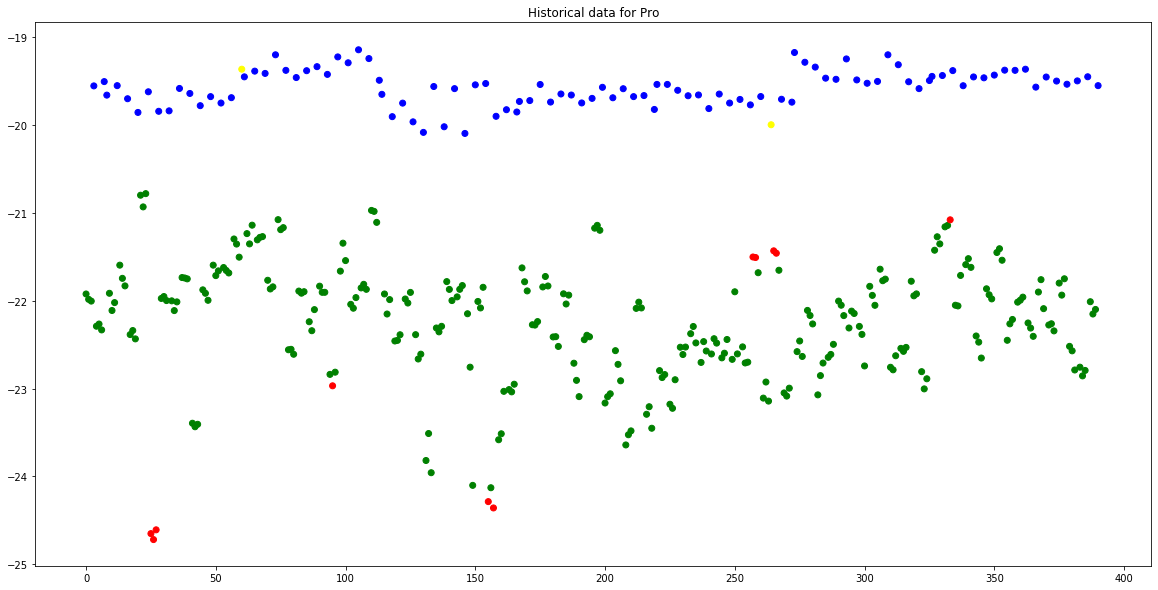

In [17]:
compound='Pro'

datePaths = []
for filename in glob.glob(file_Path + "/*.xls"):
    path = os.path.join(os.getcwd(), filename)
    datePaths.append(path)
    
datePaths.sort(key=lambda date: datetime.strptime(date.split('/')[-1].split('.')[0].upper().replace("SEPT", "SEP"), "%d%b%y"))

plt.figure(figsize=(20,10))
last = 0

for path in datePaths:
    df_all = pd.read_excel(path)
    
    all_compare = pd.concat([generateChem(df2) for _, df2 in df_all.groupby(['Identifier 1', 'Identifier 2'])])
    all_compare = all_compare.sort_index()
    
    def colorSTD(x):
        if x == 'AA std':
            return 'Blue'
        else:
            return 'Green'
        
    def colorSTD2(x):
        if x['Identifier 1'] == 'AA std':
            if x[compound] > upper_std or x[compound] < lower_std:
                return 'Yellow'
            else:
                return 'Blue'
        else:
            if x[compound] > upper or x[compound] < lower:
                return 'Red'
            else:   
                return 'Green'
        return

    
    upper, lower = outlier(all_compare[all_compare['Identifier 1'] != 'AA std'][compound])
    upper_std, lower_std = outlier(all_compare[all_compare['Identifier 1'] == 'AA std'][compound])
    
    colors = [colorSTD2(x) for _, x in all_compare.iterrows()]
    
    plt.scatter(list(range(last, len(all_compare.index) + last)), all_compare[compound], c=colors)
    last += len(all_compare.index)

plt.title("Historical data for " + compound)
plt.show()

## histograms for compounds in IS

In [18]:
def iqr(x):
    q75, q25 = np.nanpercentile(x, [75 ,25])
    iqr = q75 - q25
    return iqr
    
#use Freedman-Diaconis rule to decide bin size
def binSize(data):
    bw = 2 * iqr(data) / (len(data) ** 1/3)
    if bw == 0:
        return 1
    bins = math.ceil((data.max() - data.min()) / bw)
    return bins

#return outliers as numpy list
def find_outliers(data, compound):
    upper, lower = outlier(data[compound])
    outl = data[~data[compound].between(lower, upper)][['Identifier 1', 'Identifier 2', compound]]
    
    if len(outl) == 0:
        outl = None
        
    return outl

#return outliers as list of boolean
def find_outliers_boolean(data):
    upper, lower = outlier(data)
    outl = ~data.between(lower, upper)
        
    return outl

#generate histogram for axis
def generate_hist(ax, data):
    if len(data) > 0:
        binsize = binSize(data)
        ax.hist(data, bins=binsize, color='lightblue')
        ax.vlines(np.mean(data), *ax.get_ylim())

        ht = ax.transLimits.inverted().transform((1,1))[1]
        boxWidth = outlier(data)[0] - outlier(data)[1]
        aa_patch = Rectangle((outlier(data)[1],0), width=boxWidth, height=ht, color='lightgreen', alpha=0.5)
        ax.add_patch(aa_patch)    

        ax.vlines(outlier(data), *ax.get_ylim(), linestyle="dotted")

        infoSummery = "mean: %f, sd: %f" % (np.mean(data), np.std(data))
        ax.text(0.0, -0.12, s=infoSummery, transform=ax.transAxes, fontsize=16)
    
    return

#show mean, stdev, and outliers (+/- 2 stdev from mean)
def generate_summery(data, compound):
    display("STDEV for %s: %f" % (compound, np.std(data[compound])))
    display("Mean for %s: %f" % (compound, np.mean(data[compound])))
    outl = find_outliers(data, compound)
    if outl is not None:
        display("Outliers for %s" % (compound))
        display(outl)
    
    return

def generate_summery_2(data, compound, select):
    work = data[compound]
    
    display("STDEV for %s: %f" % (compound, np.std(work)))
    display("Mean for %s: %f" % (compound, np.mean(work)))
    outl = data[find_outliers_boolean(work)][select].dropna()
    if len(outl) != 0:
        display("Outliers for %s" % (compound))
        display(outl)
    
    return
    

#generate std and test histograms for compound in and out of AA std
def summery(data, compound):
    std_raw = data[data['Identifier 1'] == 'AA std']
    test_raw = data[data['Identifier 1'] != 'AA std']
    
    std = std_raw[compound]
    test = test_raw[compound]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    
    generate_hist(ax1, std)
    generate_hist(ax2, test)
    
    ax1.title.set_text("AA Standard " + compound)
    ax2.title.set_text("Test " + compound)
    
    plt.show()
    
    display("AA STD Summery-----------------------------")
    generate_summery(std_raw, compound)
    
    display("Test Summery-------------------------------")
    generate_summery(test_raw, compound)
    
    return

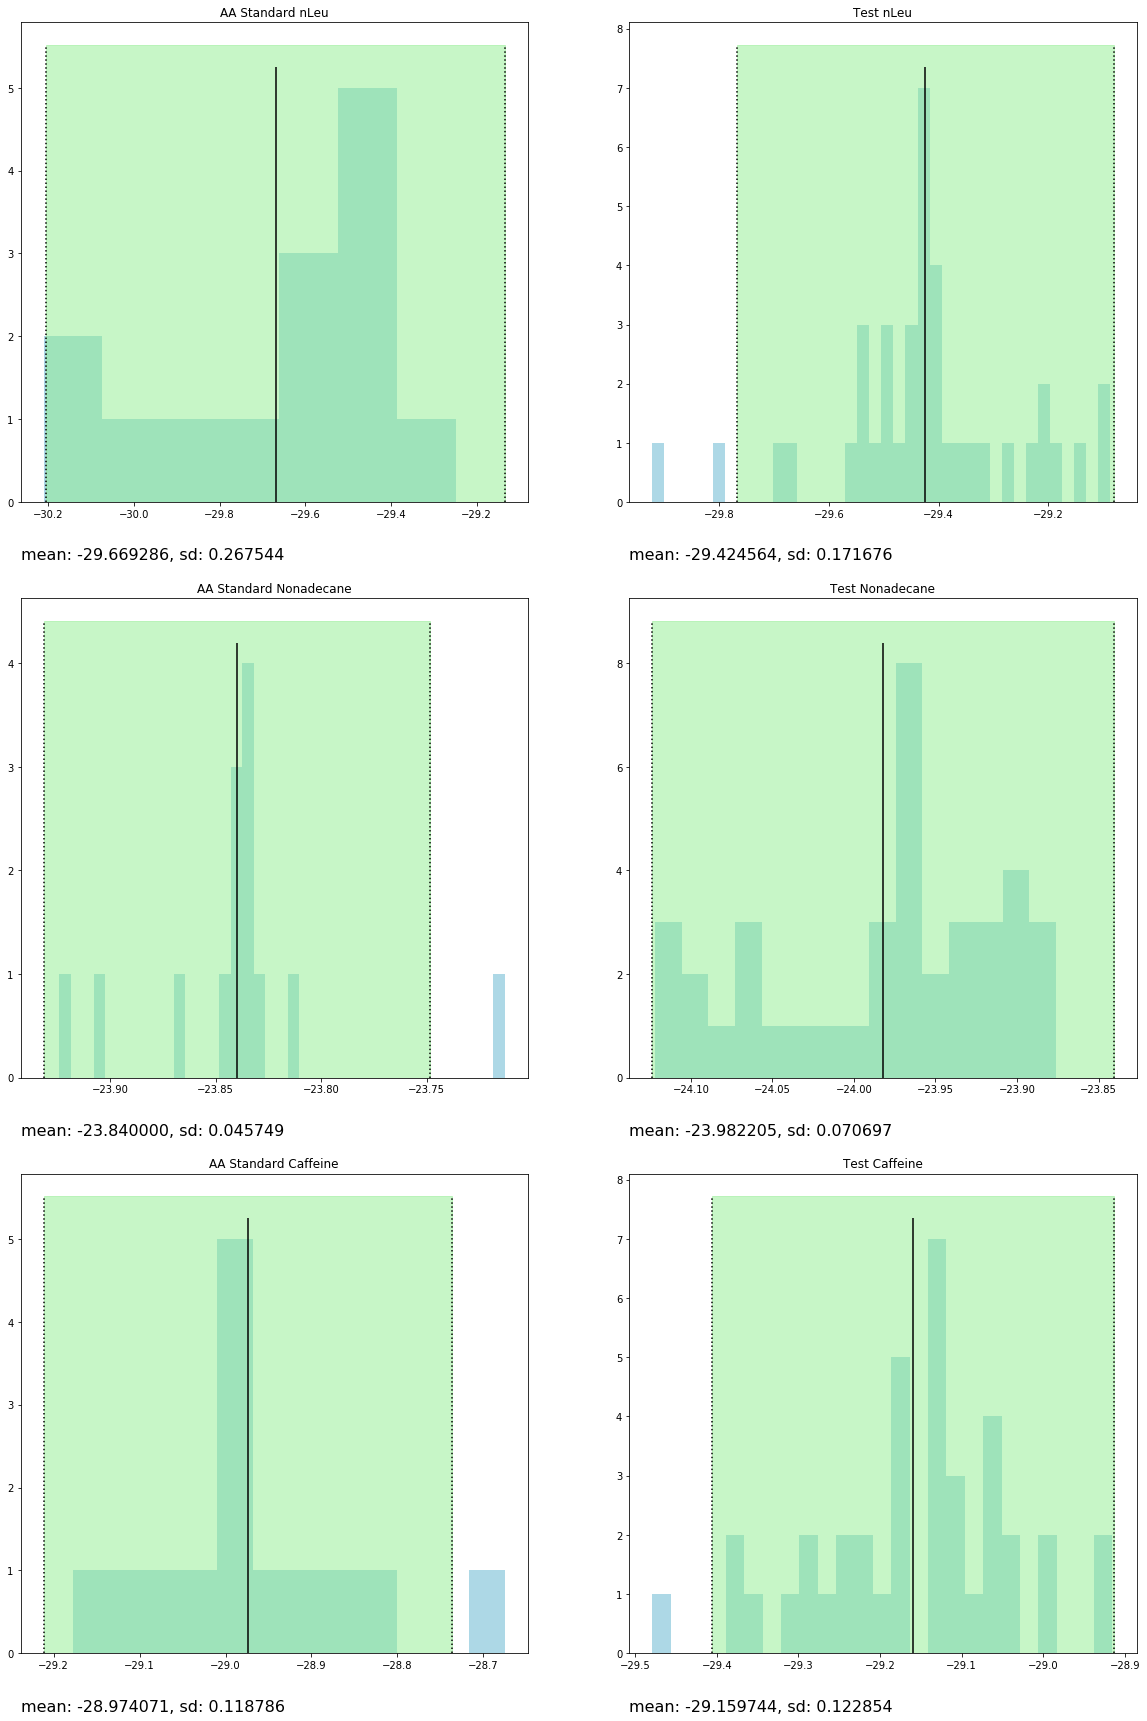

In [19]:
#calculate summery for all compounds in internal standard
std_raw = _all[_all['Identifier 1'] == 'AA std']
test_raw = _all[_all['Identifier 1'] != 'AA std']

fig, ax = plt.subplots(len(_is.index), 2, figsize=(20,30))
    
for idx, compound in enumerate(_is.index):
    std = std_raw[compound]
    test = test_raw[compound]
    
    generate_hist(ax[idx, 0], std)
    generate_hist(ax[idx, 1], test)
    
    ax[idx, 0].title.set_text("AA Standard " + compound)
    ax[idx, 1].title.set_text("Test " + compound)
    
    #display("AA STD Summery-----------------------------")
    #generate_summery(std_raw, compound)
    
    #display("Test Summery-------------------------------")
    #generate_summery(test_raw, compound)
    
plt.show()

In [20]:
#helper function
def outl_array(data, compounds):
    final = []

    for compound in compounds:
        find = data[compound]
        outl = find[find_outliers_boolean(find)].dropna()
        for idx, value in outl.items():
            final.append([compound, idx, value])
    
    return final

In [21]:
#outl for std_raw

final = []

for compound in _is.index:
    std = std_raw[compound]
    outl = std[find_outliers_boolean(std)].dropna()
    for idx, value in outl.items():
        final.append([compound, idx, value])

display(final)

display(outl_array(std_raw, _is.index))

[['nLeu', 6, -30.211], ['Nonadecane', 30, -23.713], ['Caffeine', 2, -28.675]]

[['nLeu', 6, -30.211], ['Nonadecane', 30, -23.713], ['Caffeine', 2, -28.675]]

In [22]:
#outl for final

final = []

for compound in _is.index:
    std = test_raw[compound]
    outl = std[find_outliers_boolean(std)].dropna()
    for idx, value in outl.items():
        final.append([compound, idx, value])

display(final)

display(outl_array(test_raw, _is.index))

[['nLeu', 3, -29.922], ['nLeu', 4, -29.803], ['Caffeine', 13, -29.479]]

[['nLeu', 3, -29.922], ['nLeu', 4, -29.803], ['Caffeine', 13, -29.479]]

## histograms for compounds in AA samples

'--------------------------------------'

'STDEV for Ala: 0.270187'

'Mean for Ala: -26.525714'

'Outliers for Ala'

,Identifier 1,Identifier 2,Ala
Row,,,
2,AA std,1,-25.866


'--------------------------------------'

'STDEV for Asp: 0.088435'

'Mean for Asp: -29.884357'

'Outliers for Asp'

,Identifier 1,Identifier 2,Asp
Row,,,
46,AA std,12,-30.118


'--------------------------------------'

'STDEV for Asp1: 0.147852'

'Mean for Asp1: -30.411692'

'--------------------------------------'

'STDEV for CO2-1: 0.009452'

'Mean for CO2-1: -25.148714'

'Outliers for CO2-1'

,Identifier 1,Identifier 2,CO2-1
Row,,,
38,AA std,10,-25.129


'--------------------------------------'

'STDEV for CO2-2: 0.000000'

'Mean for CO2-2: -25.220000'

'--------------------------------------'

'STDEV for CO2-3: 0.000000'

'Mean for CO2-3: -25.220000'

'--------------------------------------'

'STDEV for CO2-4: 0.007006'

'Mean for CO2-4: -25.250643'

'Outliers for CO2-4'

,Identifier 1,Identifier 2,CO2-4
Row,,,
18,AA std,5,-25.265


'--------------------------------------'

'STDEV for CO2-5: 0.011276'

'Mean for CO2-5: -25.269000'

'--------------------------------------'

'STDEV for CO2-6: 0.015159'

'Mean for CO2-6: -25.215929'

'Outliers for CO2-6'

,Identifier 1,Identifier 2,CO2-6
Row,,,
38,AA std,10,-25.252


'--------------------------------------'

'STDEV for CO2-7: 0.016873'

'Mean for CO2-7: -25.066143'

'--------------------------------------'

'STDEV for CO2-8: 0.000000'

'Mean for CO2-8: -25.220000'

'--------------------------------------'

'STDEV for CO2-9: 0.018481'

'Mean for CO2-9: -25.282857'

'Outliers for CO2-9'

,Identifier 1,Identifier 2,CO2-9
Row,,,
46,AA std,12,-25.245


'--------------------------------------'

'STDEV for Caffeine: 0.118786'

'Mean for Caffeine: -28.974071'

'Outliers for Caffeine'

,Identifier 1,Identifier 2,Caffeine
Row,,,
2,AA std,1,-28.675


'--------------------------------------'

'STDEV for Glu: 0.064777'

'Mean for Glu: -29.606071'

'Outliers for Glu'

,Identifier 1,Identifier 2,Glu
Row,,,
18,AA std,5,-29.736


'--------------------------------------'

'STDEV for Gly: 0.201548'

'Mean for Gly: -37.293143'

'Outliers for Gly'

,Identifier 1,Identifier 2,Gly
Row,,,
2,AA std,1,-36.784


'--------------------------------------'

'STDEV for His: 0.216899'

'Mean for His: -17.286357'

'--------------------------------------'

'STDEV for His1: 0.220114'

'Mean for His1: -16.375500'

'Outliers for His1'

,Identifier 1,Identifier 2,His1
Row,,,
38,AA std,10,-16.817


'--------------------------------------'

'STDEV for Ile: 0.197934'

'Mean for Ile: -19.508857'

'Outliers for Ile'

,Identifier 1,Identifier 2,Ile
Row,,,
2,AA std,1,-19.954


'--------------------------------------'

'STDEV for Leu: 0.148067'

'Mean for Leu: -29.879214'

'Outliers for Leu'

,Identifier 1,Identifier 2,Leu
Row,,,
38,AA std,10,-29.577


'--------------------------------------'

'STDEV for Lys: 0.349379'

'Mean for Lys: -30.621357'

'Outliers for Lys'

,Identifier 1,Identifier 2,Lys
Row,,,
22,AA std,6,-31.400
30,AA std,8,-31.397


'--------------------------------------'

'STDEV for Met: 0.167863'

'Mean for Met: -32.547357'

'--------------------------------------'

'STDEV for Met1: 0.164469'

'Mean for Met1: -33.269929'

'Outliers for Met1'

,Identifier 1,Identifier 2,Met1
Row,,,
2,AA std,1,-32.778


'--------------------------------------'

'STDEV for Nonadecane: 0.045749'

'Mean for Nonadecane: -23.840000'

'Outliers for Nonadecane'

,Identifier 1,Identifier 2,Nonadecane
Row,,,
30,AA std,8,-23.713


'--------------------------------------'

'STDEV for Phe: 0.056332'

'Mean for Phe: -15.928714'

'Outliers for Phe'

,Identifier 1,Identifier 2,Phe
Row,,,
30,AA std,8,-15.805


'--------------------------------------'

'STDEV for Pro: 0.103408'

'Mean for Pro: -19.345929'

'--------------------------------------'

'STDEV for Ser: 0.048959'

'Mean for Ser: -27.224429'

'Outliers for Ser'

,Identifier 1,Identifier 2,Ser
Row,,,
2,AA std,1,-27.333


'--------------------------------------'

'STDEV for Ser1: 0.155394'

'Mean for Ser1: -27.744231'

'Outliers for Ser1'

,Identifier 1,Identifier 2,Ser1
Row,,,
46,AA std,12,-27.321


'--------------------------------------'

'STDEV for Thr: 0.145320'

'Mean for Thr: -24.765071'

'Outliers for Thr'

,Identifier 1,Identifier 2,Thr
Row,,,
38,AA std,10,-24.469


'--------------------------------------'

'STDEV for Tyr: 0.102234'

'Mean for Tyr: -26.494643'

'Outliers for Tyr'

,Identifier 1,Identifier 2,Tyr
Row,,,
34,AA std,9,-26.224


'--------------------------------------'

'STDEV for Val: 0.152174'

'Mean for Val: -19.838714'

'Outliers for Val'

,Identifier 1,Identifier 2,Val
Row,,,
2,AA std,1,-19.433


'--------------------------------------'

'STDEV for nLeu: 0.267544'

'Mean for nLeu: -29.669286'

'Outliers for nLeu'

,Identifier 1,Identifier 2,nLeu
Row,,,
6,AA std,2,-30.211


'--------------------------------------'

'STDEV for Phe1: 0.000000'

'Mean for Phe1: -15.706000'

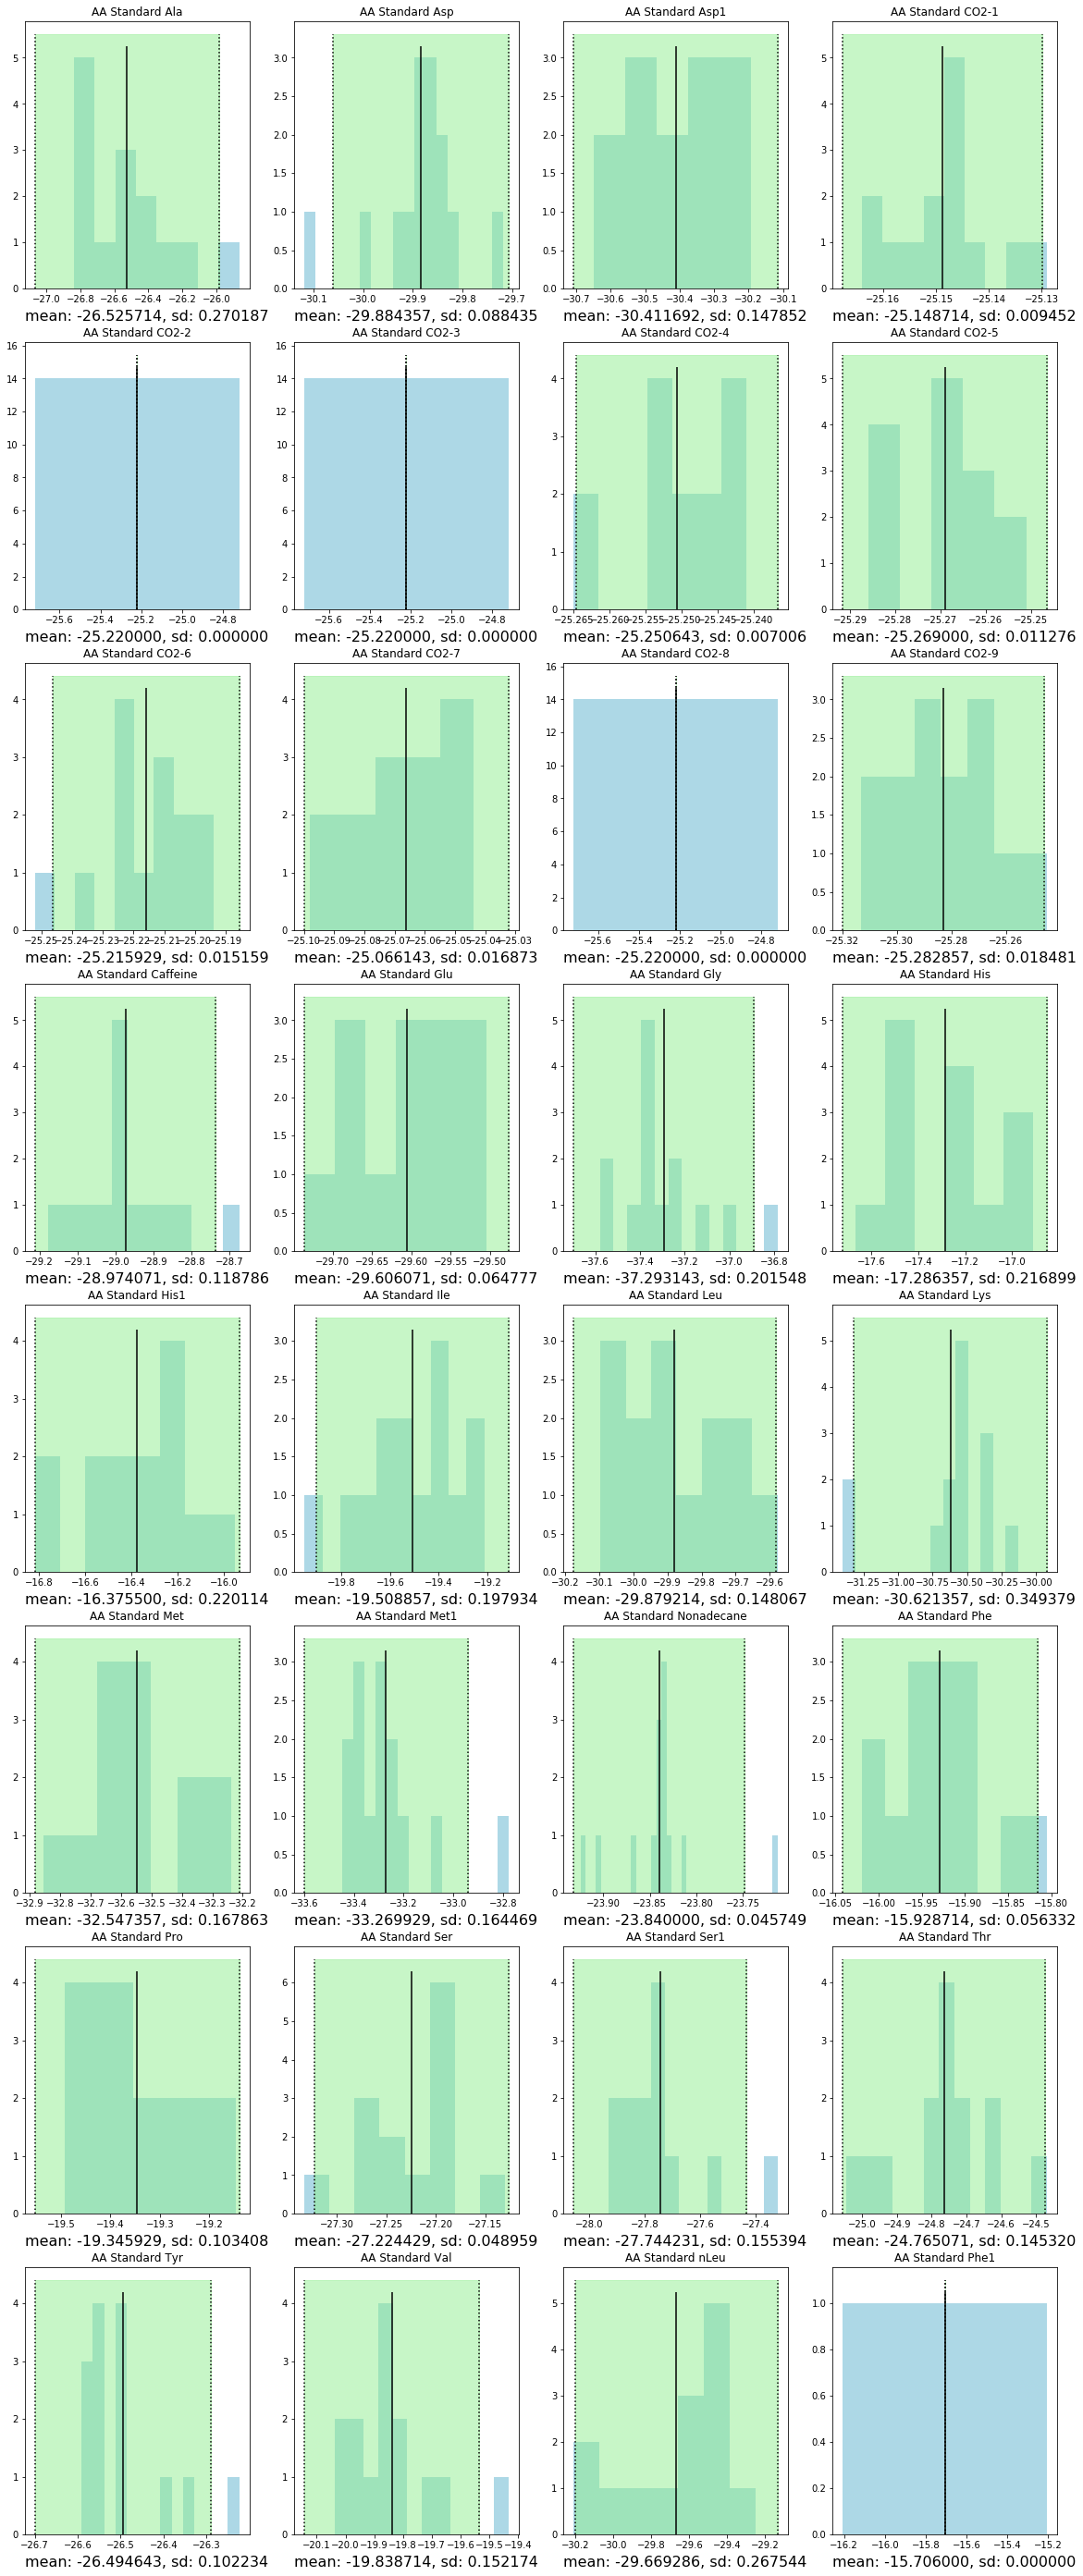

In [23]:
gW = 4
gH = math.ceil(len(aa.index) / gW)

fig, ax = plt.subplots(gH, gW, figsize=(20,50))

for idx, compound in enumerate(aa.index):
    i = idx % gW
    j = math.floor(idx / gW)
    
    std_raw = _all[_all['Identifier 1'] == 'AA std']
    std = std_raw[compound]
    std = std.dropna()
    
    generate_hist(ax[j, i], std)
    
    ax[j, i].title.set_text("AA Standard " + compound)
    
    display("--------------------------------------")
    generate_summery_2(std_raw, compound, ['Identifier 1', 'Identifier 2', compound])
    
plt.show()

In [24]:
#condensed summery for above.

final = []
std_raw = _all[_all['Identifier 1'] == 'AA std']

for compound in aa.index:
    std = std_raw[compound]
    outl = std[find_outliers_boolean(std)].dropna()
    for idx, value in outl.items():
        final.append([compound, idx, value])

display(final)

display(outl_array(std_raw, aa.index))

[['Ala', 2, -25.866],
 ['Asp', 46, -30.118],
 ['CO2-1', 38, -25.129],
 ['CO2-4', 18, -25.265],
 ['CO2-6', 38, -25.252],
 ['CO2-9', 46, -25.245],
 ['Caffeine', 2, -28.675],
 ['Glu', 18, -29.736],
 ['Gly', 2, -36.784],
 ['His1', 38, -16.817],
 ['Ile', 2, -19.954],
 ['Leu', 38, -29.577],
 ['Lys', 22, -31.4],
 ['Lys', 30, -31.397],
 ['Met1', 2, -32.778],
 ['Nonadecane', 30, -23.713],
 ['Phe', 30, -15.805],
 ['Ser', 2, -27.333],
 ['Ser1', 46, -27.321],
 ['Thr', 38, -24.469],
 ['Tyr', 34, -26.224],
 ['Val', 2, -19.433],
 ['nLeu', 6, -30.211]]

[['Ala', 2, -25.866],
 ['Asp', 46, -30.118],
 ['CO2-1', 38, -25.129],
 ['CO2-4', 18, -25.265],
 ['CO2-6', 38, -25.252],
 ['CO2-9', 46, -25.245],
 ['Caffeine', 2, -28.675],
 ['Glu', 18, -29.736],
 ['Gly', 2, -36.784],
 ['His1', 38, -16.817],
 ['Ile', 2, -19.954],
 ['Leu', 38, -29.577],
 ['Lys', 22, -31.4],
 ['Lys', 30, -31.397],
 ['Met1', 2, -32.778],
 ['Nonadecane', 30, -23.713],
 ['Phe', 30, -15.805],
 ['Ser', 2, -27.333],
 ['Ser1', 46, -27.321],
 ['Thr', 38, -24.469],
 ['Tyr', 34, -26.224],
 ['Val', 2, -19.433],
 ['nLeu', 6, -30.211]]

## standard deviations of triplicate runs

In [25]:
#write custom std for double values if not triplicate
#do _all[_all['Identifier 1'] == sample].apply(lambda x: my_std(x))
def my_std(data):
    if len(data) == 3:
        return np.std(data)
    else:
        return data.iloc[0] - data.iloc[1]
        
    

compounds = _all.drop(['Identifier 1', 'Identifier 2'], axis=1).columns

samples = _all['Identifier 1'].unique()
samples = np.delete(samples, np.where(samples == 'AA std'))
    
all_sd = [my_std(_all[_all['Identifier 1'] == sample]) for sample in samples]
all_sd = pd.concat(all_sd, keys=samples, axis=1).T
all_sd = all_sd.drop('Identifier 2', axis=1)

In [26]:
outfast = find_outliers_boolean(all_sd['Ala'])

#display(all_sd.index[all_sd.apply(lambda x: find_outliers_boolean(x))])
of = pd.DataFrame([all_sd[find_outliers_boolean(all_sd[x])][x] for x in all_sd.columns])

for col in of.columns:
    this = of[col].dropna()
    print(this.keys)
    print(this.name)
    print(this.tolist())

<bound method Series.keys of Asp      0.268158
CO2-9    0.021685
Met1     0.344484
Name: SB81 T2 S, dtype: float64>
SB81 T2 S
[0.2681579136752581, 0.021684607956387162, 0.3444844779602637]
<bound method Series.keys of Gly           0.357879
Nonadecane    0.067034
Name: SB83 T2 S, dtype: float64>
SB83 T2 S
[0.3578792471708231, 0.067033988062441]
<bound method Series.keys of Ile    0.364962
Name: SB44 T2 S, dtype: float64>
SB44 T2 S
[0.3649624029342683]
<bound method Series.keys of CO2-1    0.015513
Name: SB70 T2 S, dtype: float64>
SB70 T2 S
[0.015513435037626443]
<bound method Series.keys of Series([], Name: SB71 T2 S, dtype: float64)>
SB71 T2 S
[]
<bound method Series.keys of CO2-6    0.034296
Name: SB59 T2 S, dtype: float64>
SB59 T2 S
[0.0342960963117118]
<bound method Series.keys of Tyr    0.14558
Name: SB58 T2 S, dtype: float64>
SB58 T2 S
[0.14558006579046381]
<bound method Series.keys of Series([], Name: Check S, dtype: float64)>
Check S
[]
<bound method Series.keys of CO2-5    0.0

In [27]:
final = []

for col in all_sd.columns:
    outl = all_sd[find_outliers_boolean(all_sd[col])][col].dropna()
    for idx, value in outl.items():
        final.append([col, idx, value])

display(final)

display(outl_array(all_sd ,all_sd.columns))

[['Asp', 'SB81 T2 S', 0.2681579136752581],
 ['CO2-1', 'SB70 T2 S', 0.015513435037626443],
 ['CO2-5', 'SB46 T2 S', 0.0226274169979687],
 ['CO2-6', 'SB59 T2 S', 0.0342960963117118],
 ['CO2-9', 'SB81 T2 S', 0.021684607956387162],
 ['Glu', 'SB16 T2 S', 0.07253658080965499],
 ['Gly', 'SB83 T2 S', 0.3578792471708231],
 ['Ile', 'SB44 T2 S', 0.3649624029342683],
 ['Lys', 'SB16 T2 S', 0.43706394141920335],
 ['Met1', 'SB81 T2 S', 0.3444844779602637],
 ['Nonadecane', 'SB83 T2 S', 0.067033988062441],
 ['Pro', 'SB16 T2 S', 0.13111826722467065],
 ['Ser', 'SB02 T2 S', 0.27136977642242216],
 ['Thr', 'SB76 T2 S', 0.32181809906978254],
 ['Tyr', 'SB58 T2 S', 0.14558006579046381]]

[['Asp', 'SB81 T2 S', 0.2681579136752581],
 ['CO2-1', 'SB70 T2 S', 0.015513435037626443],
 ['CO2-5', 'SB46 T2 S', 0.0226274169979687],
 ['CO2-6', 'SB59 T2 S', 0.0342960963117118],
 ['CO2-9', 'SB81 T2 S', 0.021684607956387162],
 ['Glu', 'SB16 T2 S', 0.07253658080965499],
 ['Gly', 'SB83 T2 S', 0.3578792471708231],
 ['Ile', 'SB44 T2 S', 0.3649624029342683],
 ['Lys', 'SB16 T2 S', 0.43706394141920335],
 ['Met1', 'SB81 T2 S', 0.3444844779602637],
 ['Nonadecane', 'SB83 T2 S', 0.067033988062441],
 ['Pro', 'SB16 T2 S', 0.13111826722467065],
 ['Ser', 'SB02 T2 S', 0.27136977642242216],
 ['Thr', 'SB76 T2 S', 0.32181809906978254],
 ['Tyr', 'SB58 T2 S', 0.14558006579046381]]

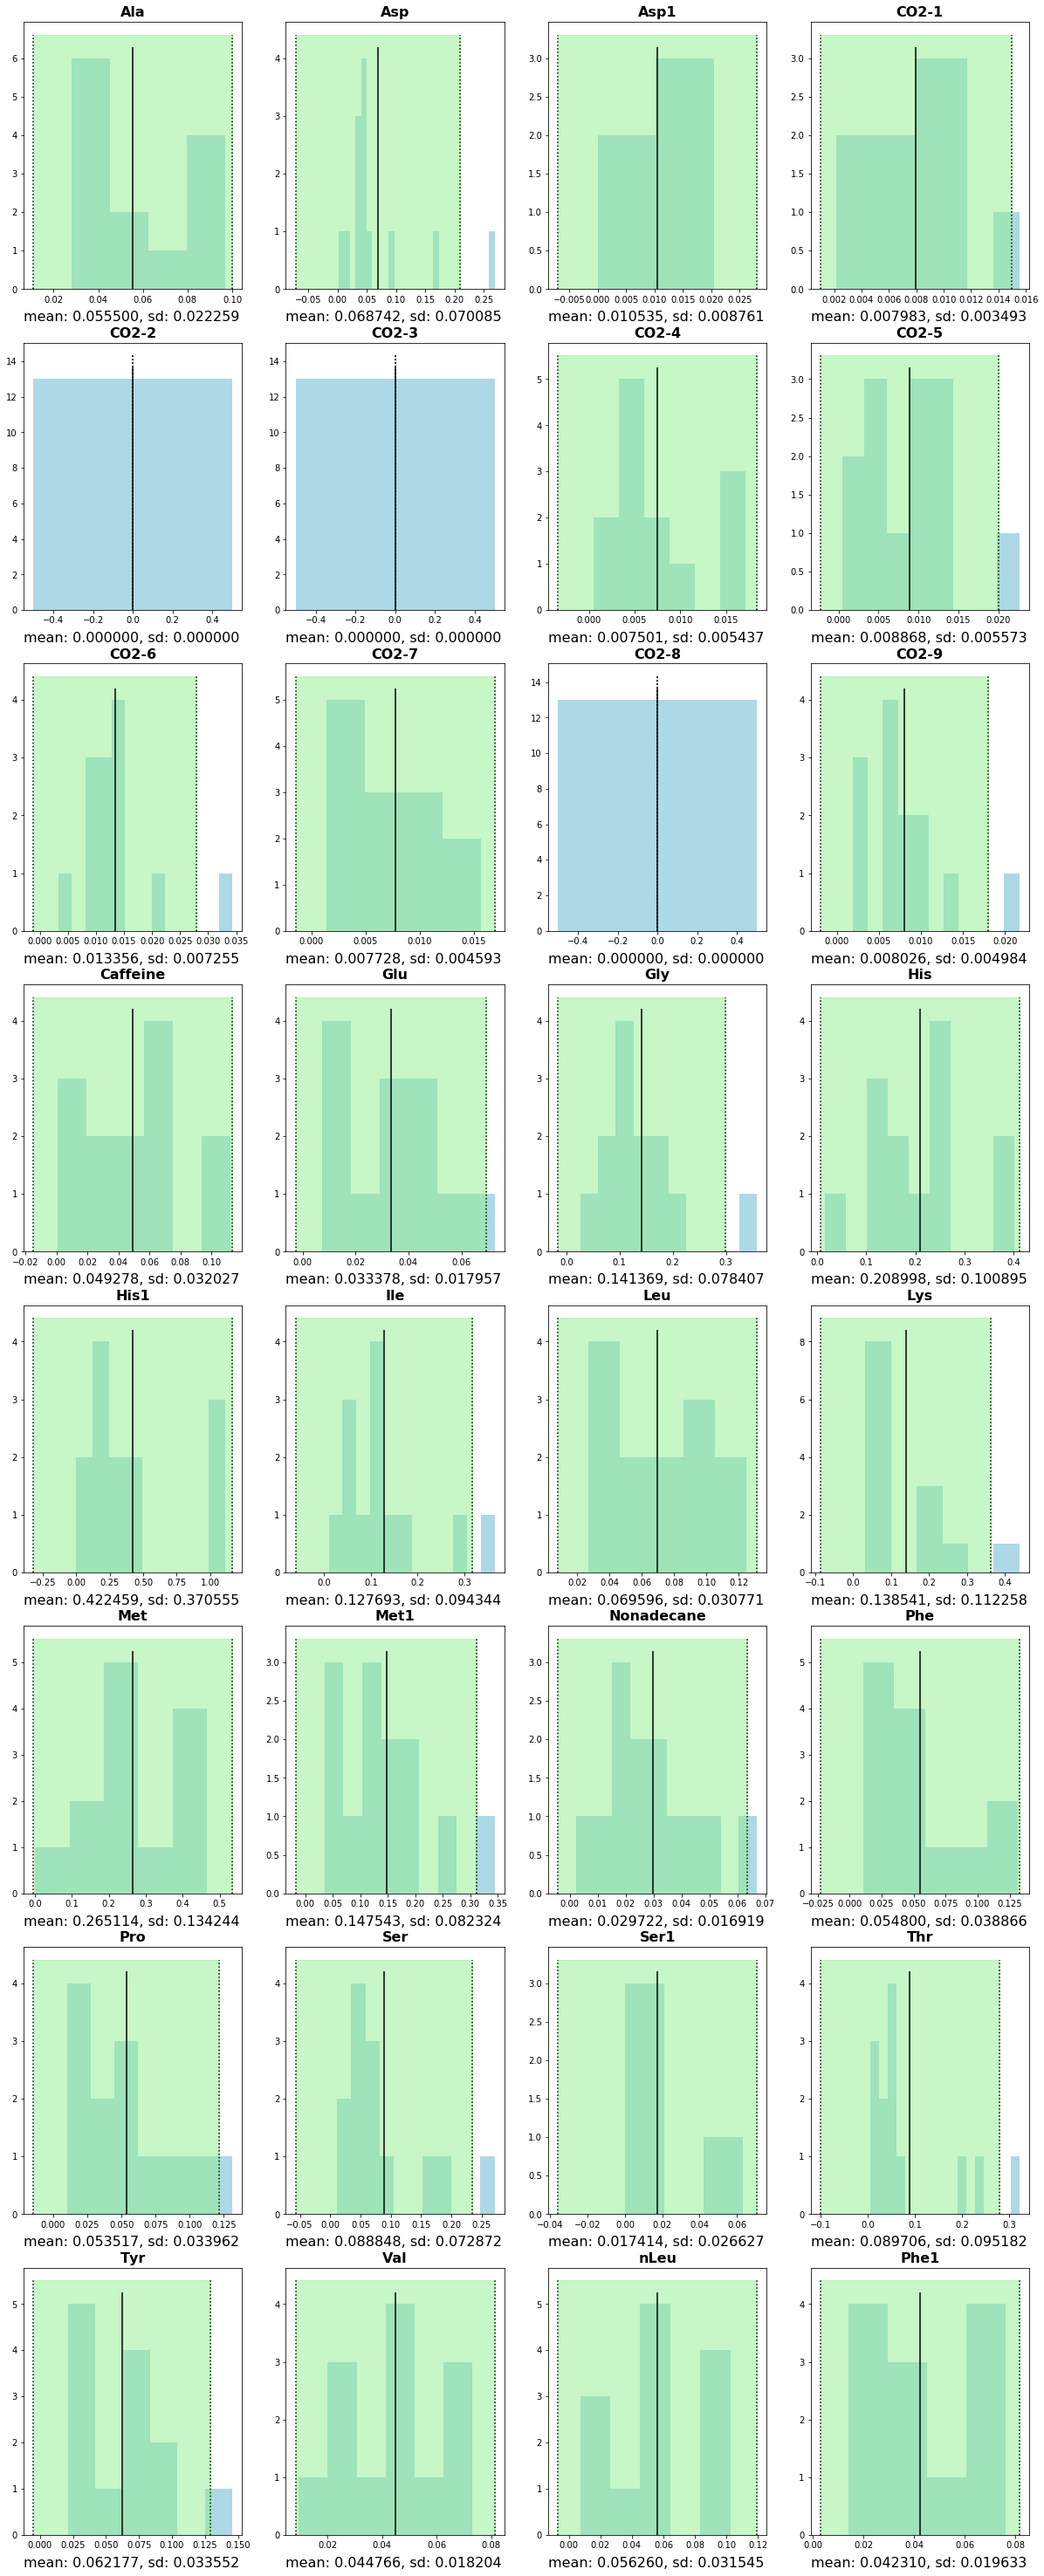

In [28]:
gW = 4
gH = math.ceil(len(all_sd.columns) / gW)


fig, ax = plt.subplots(gH, gW, figsize=(20,50))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

for idx, col in enumerate(all_sd.columns):
    i = idx % gW
    j = math.floor(idx / gW)

    generate_hist(ax[j, i], all_sd[col].dropna())

    ax[j, i].set_title(col, fontdict={'fontsize': 16, 'fontweight': 'bold'})

    #display("---------------------------------")
    #generate_summery_2(all_sd, col, compound)
    
#find outl for each column
    
plt.show()

## make triplicate dataframe

In [29]:
#get triplicate
def triplicate_norm():
    final = []
    out = _all['Identifier 1'].unique()
    out = np.delete(out, 0) #assumes aa std will always be at run 0...
    
    for sample in out:
        data = _all[_all['Identifier 1'] == sample]
        for compound in data.columns[2:]:
            alj = data[compound].values
            if not np.isnan(np.sum(alj)):
                final.append([data.index.values[0], sample, compound, alj[0], alj[1], alj[2], np.mean(alj), np.std(alj), (np.std(alj)/np.sqrt(len(alj)))])
                
    cNames = ['Row', 'Sample', 'AA', 'Inj_1', 'Inj_2', 'Inj_3', 'Mean', 'SD_inj', 'SE']
    
    return pd.DataFrame(data=final, columns=cNames)

tn = triplicate_norm()

tn

,Row,Sample,AA,Inj_1,Inj_2,Inj_3,Mean,SD_inj,SE
0,3,SB83 T2 S,Ala,-25.675,-25.752,-25.688,-25.705000,0.033655,0.019431
1,3,SB83 T2 S,Asp,-24.803,-24.798,-24.801,-24.800667,0.002055,0.001186
2,3,SB83 T2 S,CO2-1,-25.120,-25.132,-25.135,-25.129000,0.006481,0.003742
3,3,SB83 T2 S,CO2-2,-25.220,-25.220,-25.220,-25.220000,0.000000,0.000000
4,3,SB83 T2 S,CO2-3,-25.220,-25.220,-25.220,-25.220000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
384,51,SB46 T2 S,Thr,-21.759,-21.670,-21.805,-21.744667,0.056038,0.032353
385,51,SB46 T2 S,Tyr,-26.541,-26.682,-26.697,-26.640000,0.070271,0.040571
386,51,SB46 T2 S,Val,-27.780,-27.713,-27.814,-27.769000,0.041960,0.024226
387,51,SB46 T2 S,nLeu,-29.213,-29.139,-29.280,-29.210667,0.057587,0.033248


In [30]:
#get triplicate for aa std only
_all[_all['Identifier 1'] == 'AA std']

,Identifier 1,Identifier 2,Ala,Asp,Asp1,CO2-1,CO2-2,CO2-3,CO2-4,CO2-5,...,Nonadecane,Phe,Pro,Ser,Ser1,Thr,Tyr,Val,nLeu,Phe1
Row,,,,,,,,,,,,,,,,,,,,,
2,AA std,1,-25.866,-29.819,-30.194,-25.145,-25.22,-25.22,-25.253,-25.270,...,-23.837,-15.957,-19.453,-27.333,-27.779,-25.045,-26.497,-19.433,-30.103,NaN
6,AA std,2,-26.130,-29.718,-30.307,-25.156,-25.22,-25.22,-25.247,-25.260,...,-23.840,-15.886,-19.388,-27.258,-27.873,-24.974,-26.577,-19.641,-30.211,NaN
10,AA std,3,-26.275,-29.841,-30.404,-25.148,-25.22,-25.22,-25.251,-25.284,...,-23.838,-15.938,-19.414,-27.185,-27.901,-24.925,-26.548,-19.705,-29.979,NaN
14,AA std,4,-26.427,-29.852,-30.648,-25.148,-25.22,-25.22,-25.243,-25.263,...,-23.827,-15.955,-19.202,-27.229,-27.710,-24.751,-26.511,-19.825,-29.585,NaN
18,AA std,5,-26.455,-29.879,-30.395,-25.141,-25.22,-25.22,-25.265,-25.284,...,-23.868,-15.996,-19.379,-27.259,-27.930,-24.813,-26.493,-19.914,-29.847,NaN
22,AA std,6,-26.544,-29.887,-30.542,-25.135,-25.22,-25.22,-25.254,-25.270,...,-23.924,-15.927,-19.461,-27.199,-27.764,-24.767,-26.560,-19.881,-29.797,NaN
26,AA std,7,-26.640,-29.900,-30.553,-25.158,-25.22,-25.22,-25.264,-25.286,...,-23.848,-15.984,-19.383,-27.256,-27.733,-24.700,-26.558,-19.946,-29.601,NaN
30,AA std,8,-26.526,-29.870,-30.504,-25.147,-25.22,-25.22,-25.249,-25.267,...,-23.713,-15.805,-19.337,-27.196,-27.733,-24.769,-26.543,-19.855,-29.502,-15.706
34,AA std,9,-26.586,-29.856,-30.644,-25.150,-25.22,-25.22,-25.241,-25.267,...,-23.833,-15.894,-19.425,-27.130,-27.741,-24.607,-26.224,-19.805,-29.520,NaN


## Process corrections

In [31]:
file_Name = "AA_STD_d13C_d15N_Dec2019.xlsx"
file_Path = "/Users/quinnvinlove/Documents/sugarsBio/"

standard = pd.read_excel(file_Path + file_Name)

display(standard)

,Compound,Standard,d13C,d15N
0,Ala,AA1,-19.166895,-4.509684
1,Ala,AA2,-25.069272,-8.175355
2,Asp,AA2,-23.666556,-5.261537
3,Asp,AA1,-27.287541,-1.420001
4,Glu,AA2,-28.699079,-4.442138
5,Glu,AA1,-28.893942,-3.505599
6,Glu,SN,36.834305,47.670800
7,Gly,AA2,-32.001644,1.660896
8,Gly,AA1,-42.268788,3.532704
9,Gly,SN,-40.577522,2.117807


## do triplicate mean correction

In [50]:
"""
	0:sample mean
	1:std before
	2:std after
	3:mean of before/after
"""

#todo: make bail case in switch just in case
#check work

#add before, after, bamean to this
def triplicate(sw, exclusions = []):
    #set p^-1
    p_C = 0.5

    #set standard name
    s_name = 'AA1'
    corr = standard[standard.Standard == s_name]
    
    allQC = _all[_all['Identifier 1'] == 'AA std']

    for compound in corr.Compound:
        der_sample_mean = tn[tn.AA == compound].Mean
        
        indicies = tn[tn.AA == compound].Row.values
        
        before = [allQC[allQC.index < x].iloc[0][compound] for x in indicies]
        after = [allQC[allQC.index > x].iloc[0][compound] for x in indicies]
        
        if sw == 0: der_standard = np.mean(allQC[compound])  
        elif sw == 1: der_standard = before
        elif sw == 2: der_standard = after
        elif sw == 3: der_standard = np.mean([before, after])
        else: return
            
        d13C = corr[corr.Compound == compound].d13C.values[0]

        corrected = (der_sample_mean - der_standard) * p_C + d13C

        current_sample = tn[(tn.AA == compound) & (tn.Sample != 'AA std')].Sample
        
        print(compound)
        for idx, id1 in enumerate(current_sample):
            #danger: will modefy seed data
            print(corrected.iloc[idx])
            #df.loc[(df['Identifier 1'] == id1) & (df.Component == compound), 'd 13C/12C'] = corrected.iloc[idx]
            pass
    return

triplicate(0)

Ala
-18.756538133659923
-19.220704800326587
-19.166371466993255
-18.93470480032659
-19.967204800326588
-19.607371466993257
-19.641038133659922
-19.20253813365992
-19.74953813365992
-19.371371466993256
-19.237371466993256
-19.380038133659923
-19.352538133659923
Asp
-24.74569552505823
-24.828195525058227
-24.973862191724898
-24.617528858391566
-25.527028858391564
-25.224362191724897
-25.348528858391564
-24.968862191724895
-25.471028858391563
-25.041195525058228
-24.318028858391564
-24.86619552505823
-24.736028858391563
Glu
-24.95307279134549
-25.27057279134549
-25.39007279134549
-25.07240612467882
-26.01290612467882
-25.692406124678826
-25.648239458012156
-25.36840612467882
-25.850239458012155
-25.314072791345488
-25.00357279134549
-25.359739458012157
-25.06207279134549
Gly
-34.88638326969717
-35.3767166030305
-35.14138326969717
-34.788549936363836
-36.538883269697166
-35.34638326969717
-35.76838326969717
-35.11204993636384
-36.046049936363836
-35.218549936363836
-34.821383269697165
-35.

In [49]:
#correct individuals

def triplicate2(sw, exclusions=[]):
    #set p^-1
    p_C = 0.5

    #set standard name
    s_name = 'AA1'
    corr = standard[standard.Standard == s_name]
    
    allQC = _all[_all['Identifier 1'] == 'AA std']
    
    for idx, row in tn.iterrows(): #could reduce this to map...
        samp = np.mean([row.Inj_1, row.Inj_2, row.Inj_3])
        
        before = allQC[allQC.index < row.Row].iloc[0][row.AA]
        after = allQC[allQC.index > row.Row].iloc[0][row.AA]
        bam = np.mean([before, after])
        
        if sw == 0: der_standard = np.mean(allQC[row.AA])
        elif sw == 1: der_standard = before
        elif sw == 2: der_standard = after
        elif sw == 3: der_standard = bam
        
        if len(corr[corr.Compound == row.AA]) > 0:
            d13C = corr[corr.Compound == row.AA].d13C.values[0]

            corrected = (samp - der_standard) * p_C + d13C

            #danger: below will modefy seed data
            print(row.AA)
            print(corrected)
            #df.loc[(df['Identifier 1'] == row.Sample) & (df.Component == row.AA), 'd 13C/12C'] = corrected
        
triplicate2(0)

Ala
-18.756538133659923
Asp
-24.74569552505823
Glu
-24.95307279134549
Gly
-34.88638326969717
His
-11.019982295944095
Ile
-13.895743306197925
Leu
-28.50190865811782
Lys
-25.47787866508176
Met
-31.476215938923797
Phe
-17.079864293169585
Pro
-13.192851961768744
Ser
-12.659236538101378
Thr
-8.681062315449754
Tyr
-24.46908122763277
Val
-14.619234810211493
nLeu
-27.91303618426644
Ala
-19.220704800326587
Asp
-24.828195525058227
Glu
-25.27057279134549
Gly
-35.3767166030305
His
-11.282648962610761
Ile
-13.457909972864593
Leu
-28.249908658117818
Lys
-25.399378665081763
Met
-31.58504927225713
Phe
-17.037030959836255
Pro
-13.214018628435413
Ser
-12.634569871434714
Thr
-8.781895648783088
Tyr
-24.39008122763277
Val
-14.679568143544826
nLeu
-27.70803618426644
Ala
-19.166371466993255
Asp
-24.973862191724898
Glu
-25.39007279134549
Gly
-35.14138326969717
His
-10.86364896261076
Ile
-13.80507663953126
Leu
-28.445241991451155
Lys
-25.51487866508176
Met
-31.493715938923796
Phe
-17.219197626502922
Pro
-13.48

In [34]:
df

,Row,Identifier 1,Identifier 2,Rt,Component,d 13C/12C,Ampl 44,BGD 44,Width,Notes
0,2,AA std,1,44.9,CO2-1,-25.145,5592,5.4,23.0,NaN
1,2,AA std,1,84.6,CO2-2,-25.220,5590,5.9,22.8,NaN
2,2,AA std,1,124.6,CO2-3,-25.220,5596,6.1,23.0,NaN
3,2,AA std,1,164.5,CO2-4,-25.253,5595,6.1,23.0,NaN
4,2,AA std,1,204.2,CO2-5,-25.270,5597,6.2,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2055,54,AA std,14,1671.0,His,-17.125,1069,39.2,14.0,NaN
2056,54,AA std,14,1671.0,His1,-16.548,1069,85.2,14.0,red BG
2057,54,AA std,14,1926.1,CO2-7,-25.057,5660,15.4,22.8,NaN
2058,54,AA std,14,1965.9,CO2-8,-25.220,5658,16.3,23.0,NaN


In [35]:
pd.set_option('display.max_rows', None)

In [36]:
#find aa std preceding measurement...

myrow = 3
compound = 'Ala'

der_standard = _all[_all['Identifier 1'] == 'AA std']

before = der_standard[der_standard.index < myrow].iloc[0][compound]

after = der_standard[der_standard.index > myrow].iloc[0][compound]

mean = np.mean([before, after])

In [37]:
display(tn)

,Row,Sample,AA,Inj_1,Inj_2,Inj_3,Mean,SD_inj,SE
0,3,SB83 T2 S,Ala,-25.675,-25.752,-25.688,-25.705000,0.033655,0.019431
1,3,SB83 T2 S,Asp,-24.803,-24.798,-24.801,-24.800667,0.002055,0.001186
2,3,SB83 T2 S,CO2-1,-25.120,-25.132,-25.135,-25.129000,0.006481,0.003742
3,3,SB83 T2 S,CO2-2,-25.220,-25.220,-25.220,-25.220000,0.000000,0.000000
4,3,SB83 T2 S,CO2-3,-25.220,-25.220,-25.220,-25.220000,0.000000,0.000000
5,3,SB83 T2 S,CO2-4,-25.237,-25.249,-25.247,-25.244333,0.005249,0.003031
6,3,SB83 T2 S,CO2-5,-25.254,-25.274,-25.277,-25.268333,0.010209,0.005894
7,3,SB83 T2 S,CO2-6,-25.188,-25.175,-25.162,-25.175000,0.010614,0.006128
8,3,SB83 T2 S,CO2-7,-25.070,-25.057,-25.070,-25.065667,0.006128,0.003538
9,3,SB83 T2 S,CO2-8,-25.220,-25.220,-25.220,-25.220000,0.000000,0.000000


AA_IScorr = AA_ measured - (IS_ residual)
IS_residual = IS_measured - IS_mean
AA_ROcorr = AA_measured - Runorder*slope

In [38]:
_all[_all['Identifier 1'] == 'AA std']

,Identifier 1,Identifier 2,Ala,Asp,Asp1,CO2-1,CO2-2,CO2-3,CO2-4,CO2-5,...,Nonadecane,Phe,Pro,Ser,Ser1,Thr,Tyr,Val,nLeu,Phe1
Row,,,,,,,,,,,,,,,,,,,,,
2,AA std,1,-25.866,-29.819,-30.194,-25.145,-25.22,-25.22,-25.253,-25.270,...,-23.837,-15.957,-19.453,-27.333,-27.779,-25.045,-26.497,-19.433,-30.103,NaN
6,AA std,2,-26.130,-29.718,-30.307,-25.156,-25.22,-25.22,-25.247,-25.260,...,-23.840,-15.886,-19.388,-27.258,-27.873,-24.974,-26.577,-19.641,-30.211,NaN
10,AA std,3,-26.275,-29.841,-30.404,-25.148,-25.22,-25.22,-25.251,-25.284,...,-23.838,-15.938,-19.414,-27.185,-27.901,-24.925,-26.548,-19.705,-29.979,NaN
14,AA std,4,-26.427,-29.852,-30.648,-25.148,-25.22,-25.22,-25.243,-25.263,...,-23.827,-15.955,-19.202,-27.229,-27.710,-24.751,-26.511,-19.825,-29.585,NaN
18,AA std,5,-26.455,-29.879,-30.395,-25.141,-25.22,-25.22,-25.265,-25.284,...,-23.868,-15.996,-19.379,-27.259,-27.930,-24.813,-26.493,-19.914,-29.847,NaN
22,AA std,6,-26.544,-29.887,-30.542,-25.135,-25.22,-25.22,-25.254,-25.270,...,-23.924,-15.927,-19.461,-27.199,-27.764,-24.767,-26.560,-19.881,-29.797,NaN
26,AA std,7,-26.640,-29.900,-30.553,-25.158,-25.22,-25.22,-25.264,-25.286,...,-23.848,-15.984,-19.383,-27.256,-27.733,-24.700,-26.558,-19.946,-29.601,NaN
30,AA std,8,-26.526,-29.870,-30.504,-25.147,-25.22,-25.22,-25.249,-25.267,...,-23.713,-15.805,-19.337,-27.196,-27.733,-24.769,-26.543,-19.855,-29.502,-15.706
34,AA std,9,-26.586,-29.856,-30.644,-25.150,-25.22,-25.22,-25.241,-25.267,...,-23.833,-15.894,-19.425,-27.130,-27.741,-24.607,-26.224,-19.805,-29.520,NaN


In [39]:
my_is = "Nonadecane"
standardData = _all[_all['Identifier 1'] == 'AA std']
IS_residual = standardData[my_is] - np.mean(standardData[my_is])
display(IS_residual)

subj = "Ala"
AA_IScorr = standardData[subj]-IS_residual
display(AA_IScorr)

Row
2     0.003
6     0.000
10    0.002
14    0.013
18   -0.028
22   -0.084
26   -0.008
30    0.127
34    0.007
38    0.003
42    0.004
46    0.028
50   -0.002
54   -0.065
Name: Nonadecane, dtype: float64

Row
2    -25.869
6    -26.130
10   -26.277
14   -26.440
18   -26.427
22   -26.460
26   -26.632
30   -26.653
34   -26.593
38   -26.788
42   -26.760
46   -26.866
50   -26.730
54   -26.735
dtype: float64

In [40]:
standardData[subj].index


Int64Index([2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54], dtype='int64', name='Row')

In [41]:
slope = 0.5
Runorder = standardData[subj].index
AA_ROcorr = standardData[subj] - Runorder * slope

Do I do a mean of just the AA standrd values for the IS, or all measurements of the IS?
what is run order in this case?

## reference_measured tab

In [42]:
qaName = "Check S"
comp = ['Ala', 'Asp', 'Asp1']

samp = _all[_all['Identifier 1'] == qaName]
samp = samp[comp]
samp = samp.T

new_label = ["Inj_%d" % x for x in range(len(samp.columns))]
old_label = samp.columns
samp = samp.rename(columns=dict(zip(old_label, new_label)))

sd = samp.std(axis=1)
mean = samp.mean(axis=1)
samp.insert(loc=0, column='SD', value=sd)
samp.insert(loc=0, column='Mean_d13C', value=mean)

samp.index = samp.index.rename('Compound')
samp = samp.reset_index()

samp.insert(loc=0, column='Reference', value=qaName)

samp

Row,Reference,Compound,Mean_d13C,SD,Inj_0,Inj_1,Inj_2
0,Check S,Ala,-26.952000,0.118457,-26.828,-26.964,-27.064
1,Check S,Asp,-25.041667,0.048789,-25.013,-25.014,-25.098
2,Check S,Asp1,NaN,NaN,NaN,NaN,NaN


In [43]:
_all

,Identifier 1,Identifier 2,Ala,Asp,Asp1,CO2-1,CO2-2,CO2-3,CO2-4,CO2-5,...,Nonadecane,Phe,Pro,Ser,Ser1,Thr,Tyr,Val,nLeu,Phe1
Row,,,,,,,,,,,,,,,,,,,,,
2,AA std,1,-25.866,-29.819,-30.194,-25.145,-25.22,-25.22,-25.253,-25.270,...,-23.837,-15.957,-19.453,-27.333,-27.779,-25.045,-26.497,-19.433,-30.103,NaN
3,SB83 T2 S,1,-25.675,-24.803,NaN,-25.120,-25.22,-25.22,-25.237,-25.254,...,-23.963,-25.732,-21.237,-25.410,NaN,-21.341,-27.192,-27.508,-29.922,-25.620
4,SB83 T2 S,2,-25.752,-24.798,NaN,-25.132,-25.22,-25.22,-25.249,-25.274,...,-24.122,-25.734,-21.354,-25.289,NaN,-21.311,-27.214,-27.585,-29.803,-25.630
5,SB83 T2 S,3,-25.688,-24.801,NaN,-25.135,-25.22,-25.22,-25.247,-25.277,...,-24.078,-25.711,-21.141,-25.329,NaN,-21.241,-27.155,-27.641,-29.671,-25.677
6,AA std,2,-26.130,-29.718,-30.307,-25.156,-25.22,-25.22,-25.247,-25.260,...,-23.840,-15.886,-19.388,-27.258,-27.873,-24.974,-26.577,-19.641,-30.211,NaN
7,SB44 T2 S,1,-26.520,-24.885,NaN,-25.143,-25.22,-25.22,-25.242,-25.262,...,-23.906,-25.471,-21.308,-25.216,NaN,-21.484,-26.921,-27.683,-29.423,NaN
8,SB44 T2 S,2,-26.708,-24.990,NaN,-25.154,-25.22,-25.22,-25.234,-25.272,...,-23.922,-25.693,-21.280,-25.277,NaN,-21.517,-27.041,-27.674,-29.317,-25.599
9,SB44 T2 S,3,-26.672,-25.022,NaN,-25.138,-25.22,-25.22,-25.261,-25.259,...,-23.931,-25.756,-21.271,-25.387,NaN,-21.497,-27.125,-27.739,-29.426,-25.656
10,AA std,3,-26.275,-29.841,-30.404,-25.148,-25.22,-25.22,-25.251,-25.284,...,-23.838,-15.938,-19.414,-27.185,-27.901,-24.925,-26.548,-19.705,-29.979,NaN


In [44]:
df

,Row,Identifier 1,Identifier 2,Rt,Component,d 13C/12C,Ampl 44,BGD 44,Width,Notes
0,2,AA std,1,44.9,CO2-1,-25.145000,5592,5.4,23.0,NaN
1,2,AA std,1,84.6,CO2-2,-25.220000,5590,5.9,22.8,NaN
2,2,AA std,1,124.6,CO2-3,-25.220000,5596,6.1,23.0,NaN
3,2,AA std,1,164.5,CO2-4,-25.253000,5595,6.1,23.0,NaN
4,2,AA std,1,204.2,CO2-5,-25.270000,5597,6.2,23.0,NaN
5,2,AA std,1,602.8,Blank,-46.614000,188,5.0,5.6,NaN
6,2,AA std,1,608.0,Blank,-26.350000,2754,5.0,13.0,NaN
7,2,AA std,1,631.8,Ala,-25.866000,4568,27.7,16.9,NaN
8,2,AA std,1,646.4,Blank,-20.689000,752,27.7,14.4,NaN
9,2,AA std,1,664.4,Gly,-36.784000,1721,31.8,21.5,NaN


In [45]:
_all

,Identifier 1,Identifier 2,Ala,Asp,Asp1,CO2-1,CO2-2,CO2-3,CO2-4,CO2-5,...,Nonadecane,Phe,Pro,Ser,Ser1,Thr,Tyr,Val,nLeu,Phe1
Row,,,,,,,,,,,,,,,,,,,,,
2,AA std,1,-25.866,-29.819,-30.194,-25.145,-25.22,-25.22,-25.253,-25.270,...,-23.837,-15.957,-19.453,-27.333,-27.779,-25.045,-26.497,-19.433,-30.103,NaN
3,SB83 T2 S,1,-25.675,-24.803,NaN,-25.120,-25.22,-25.22,-25.237,-25.254,...,-23.963,-25.732,-21.237,-25.410,NaN,-21.341,-27.192,-27.508,-29.922,-25.620
4,SB83 T2 S,2,-25.752,-24.798,NaN,-25.132,-25.22,-25.22,-25.249,-25.274,...,-24.122,-25.734,-21.354,-25.289,NaN,-21.311,-27.214,-27.585,-29.803,-25.630
5,SB83 T2 S,3,-25.688,-24.801,NaN,-25.135,-25.22,-25.22,-25.247,-25.277,...,-24.078,-25.711,-21.141,-25.329,NaN,-21.241,-27.155,-27.641,-29.671,-25.677
6,AA std,2,-26.130,-29.718,-30.307,-25.156,-25.22,-25.22,-25.247,-25.260,...,-23.840,-15.886,-19.388,-27.258,-27.873,-24.974,-26.577,-19.641,-30.211,NaN
7,SB44 T2 S,1,-26.520,-24.885,NaN,-25.143,-25.22,-25.22,-25.242,-25.262,...,-23.906,-25.471,-21.308,-25.216,NaN,-21.484,-26.921,-27.683,-29.423,NaN
8,SB44 T2 S,2,-26.708,-24.990,NaN,-25.154,-25.22,-25.22,-25.234,-25.272,...,-23.922,-25.693,-21.280,-25.277,NaN,-21.517,-27.041,-27.674,-29.317,-25.599
9,SB44 T2 S,3,-26.672,-25.022,NaN,-25.138,-25.22,-25.22,-25.261,-25.259,...,-23.931,-25.756,-21.271,-25.387,NaN,-21.497,-27.125,-27.739,-29.426,-25.656
10,AA std,3,-26.275,-29.841,-30.404,-25.148,-25.22,-25.22,-25.251,-25.284,...,-23.838,-15.938,-19.414,-27.185,-27.901,-24.925,-26.548,-19.705,-29.979,NaN


In [56]:
_all['Identifier 1'].unique()


array(['AA std', 'SB83 T2 S', 'SB44 T2 S', 'SB70 T2 S', 'SB76 T2 S',
       'SB71 T2 S', 'SB02 T2 S', 'SB59 T2 S', 'SB81 T2 S', 'SB22 T2 S',
       'SB16 T2 S', 'SB58 T2 S', 'Check S', 'SB46 T2 S'], dtype=object)

In [75]:
injs = _all['Identifier 1'].unique()


allmy = [_all[_all['Identifier 1'] == inj].iloc[0] for inj in injs]    
allmy_final = pd.DataFrame(allmy)

In [76]:
allmy_final

,Identifier 1,Identifier 2,Ala,Asp,Asp1,CO2-1,CO2-2,CO2-3,CO2-4,CO2-5,...,Nonadecane,Phe,Pro,Ser,Ser1,Thr,Tyr,Val,nLeu,Phe1
2,AA std,1,-25.866,-29.819,-30.194,-25.145,-25.22,-25.22,-25.253,-25.270,...,-23.837,-15.957,-19.453,-27.333,-27.779,-25.045,-26.497,-19.433,-30.103,NaN
3,SB83 T2 S,1,-25.675,-24.803,NaN,-25.120,-25.22,-25.22,-25.237,-25.254,...,-23.963,-25.732,-21.237,-25.410,NaN,-21.341,-27.192,-27.508,-29.922,-25.620
7,SB44 T2 S,1,-26.520,-24.885,NaN,-25.143,-25.22,-25.22,-25.242,-25.262,...,-23.906,-25.471,-21.308,-25.216,NaN,-21.484,-26.921,-27.683,-29.423,NaN
11,SB70 T2 S,1,-26.452,-25.193,NaN,-25.171,-25.22,-25.22,-25.234,-25.260,...,-23.959,-26.000,-21.768,-25.392,NaN,-20.907,-27.123,-27.859,-29.465,-25.889
15,SB76 T2 S,1,-25.989,-24.494,-24.982,-25.129,-25.22,-25.22,-25.249,-25.251,...,-23.933,-25.060,-21.078,-25.107,NaN,-21.081,-26.520,-27.221,-29.525,-24.965
19,SB71 T2 S,1,-28.079,-26.308,NaN,-25.159,-25.22,-25.22,-25.271,-25.272,...,-23.906,-27.769,-22.559,-26.943,NaN,-22.985,-28.862,-30.058,-29.420,-27.731
23,SB02 T2 S,1,-27.356,-25.809,-25.614,-25.150,-25.22,-25.22,-25.235,-25.258,...,-23.915,-26.060,-21.891,-26.362,-26.088,-22.505,-27.243,-28.745,-29.498,NaN
27,SB59 T2 S,1,-27.440,-26.134,NaN,-25.154,-25.22,-25.22,-25.260,-25.290,...,-23.971,-26.349,-22.240,-26.368,NaN,-21.650,-27.593,-28.928,-29.551,-26.398
31,SB81 T2 S,1,-26.481,-24.868,NaN,-25.124,-25.22,-25.22,-25.230,-25.260,...,-23.904,-26.049,-21.835,-25.133,NaN,-21.273,-27.410,-28.211,-29.087,NaN
35,SB22 T2 S,1,-27.730,-26.223,-26.524,-25.156,-25.22,-25.22,-25.244,-25.275,...,-23.891,-27.462,-22.839,-26.932,-26.783,-23.183,-28.491,-29.917,-29.206,-27.398


In [77]:
allmy = allmy_final.rename(columns={"Identifier 1": "Sample_ID"})
allmy = allmy.drop(['Identifier 2'], axis=1)

In [78]:
allmy

,Sample_ID,Ala,Asp,Asp1,CO2-1,CO2-2,CO2-3,CO2-4,CO2-5,CO2-6,...,Nonadecane,Phe,Pro,Ser,Ser1,Thr,Tyr,Val,nLeu,Phe1
2,AA std,-25.866,-29.819,-30.194,-25.145,-25.22,-25.22,-25.253,-25.270,-25.236,...,-23.837,-15.957,-19.453,-27.333,-27.779,-25.045,-26.497,-19.433,-30.103,NaN
3,SB83 T2 S,-25.675,-24.803,NaN,-25.120,-25.22,-25.22,-25.237,-25.254,-25.188,...,-23.963,-25.732,-21.237,-25.410,NaN,-21.341,-27.192,-27.508,-29.922,-25.620
7,SB44 T2 S,-26.520,-24.885,NaN,-25.143,-25.22,-25.22,-25.242,-25.262,-25.171,...,-23.906,-25.471,-21.308,-25.216,NaN,-21.484,-26.921,-27.683,-29.423,NaN
11,SB70 T2 S,-26.452,-25.193,NaN,-25.171,-25.22,-25.22,-25.234,-25.260,-25.182,...,-23.959,-26.000,-21.768,-25.392,NaN,-20.907,-27.123,-27.859,-29.465,-25.889
15,SB76 T2 S,-25.989,-24.494,-24.982,-25.129,-25.22,-25.22,-25.249,-25.251,-25.164,...,-23.933,-25.060,-21.078,-25.107,NaN,-21.081,-26.520,-27.221,-29.525,-24.965
19,SB71 T2 S,-28.079,-26.308,NaN,-25.159,-25.22,-25.22,-25.271,-25.272,-25.175,...,-23.906,-27.769,-22.559,-26.943,NaN,-22.985,-28.862,-30.058,-29.420,-27.731
23,SB02 T2 S,-27.356,-25.809,-25.614,-25.150,-25.22,-25.22,-25.235,-25.258,-25.194,...,-23.915,-26.060,-21.891,-26.362,-26.088,-22.505,-27.243,-28.745,-29.498,NaN
27,SB59 T2 S,-27.440,-26.134,NaN,-25.154,-25.22,-25.22,-25.260,-25.290,-25.221,...,-23.971,-26.349,-22.240,-26.368,NaN,-21.650,-27.593,-28.928,-29.551,-26.398
31,SB81 T2 S,-26.481,-24.868,NaN,-25.124,-25.22,-25.22,-25.230,-25.260,-25.187,...,-23.904,-26.049,-21.835,-25.133,NaN,-21.273,-27.410,-28.211,-29.087,NaN
35,SB22 T2 S,-27.730,-26.223,-26.524,-25.156,-25.22,-25.22,-25.244,-25.275,-25.172,...,-23.891,-27.462,-22.839,-26.932,-26.783,-23.183,-28.491,-29.917,-29.206,-27.398


In [79]:
allmy.insert(0, 'Project', 'foo')
allmy.insert(1, 'Sequence', 'bar')

allmy

,Project,Sequence,Sample_ID,Ala,Asp,Asp1,CO2-1,CO2-2,CO2-3,CO2-4,...,Nonadecane,Phe,Pro,Ser,Ser1,Thr,Tyr,Val,nLeu,Phe1
2,foo,bar,AA std,-25.866,-29.819,-30.194,-25.145,-25.22,-25.22,-25.253,...,-23.837,-15.957,-19.453,-27.333,-27.779,-25.045,-26.497,-19.433,-30.103,NaN
3,foo,bar,SB83 T2 S,-25.675,-24.803,NaN,-25.120,-25.22,-25.22,-25.237,...,-23.963,-25.732,-21.237,-25.410,NaN,-21.341,-27.192,-27.508,-29.922,-25.620
7,foo,bar,SB44 T2 S,-26.520,-24.885,NaN,-25.143,-25.22,-25.22,-25.242,...,-23.906,-25.471,-21.308,-25.216,NaN,-21.484,-26.921,-27.683,-29.423,NaN
11,foo,bar,SB70 T2 S,-26.452,-25.193,NaN,-25.171,-25.22,-25.22,-25.234,...,-23.959,-26.000,-21.768,-25.392,NaN,-20.907,-27.123,-27.859,-29.465,-25.889
15,foo,bar,SB76 T2 S,-25.989,-24.494,-24.982,-25.129,-25.22,-25.22,-25.249,...,-23.933,-25.060,-21.078,-25.107,NaN,-21.081,-26.520,-27.221,-29.525,-24.965
19,foo,bar,SB71 T2 S,-28.079,-26.308,NaN,-25.159,-25.22,-25.22,-25.271,...,-23.906,-27.769,-22.559,-26.943,NaN,-22.985,-28.862,-30.058,-29.420,-27.731
23,foo,bar,SB02 T2 S,-27.356,-25.809,-25.614,-25.150,-25.22,-25.22,-25.235,...,-23.915,-26.060,-21.891,-26.362,-26.088,-22.505,-27.243,-28.745,-29.498,NaN
27,foo,bar,SB59 T2 S,-27.440,-26.134,NaN,-25.154,-25.22,-25.22,-25.260,...,-23.971,-26.349,-22.240,-26.368,NaN,-21.650,-27.593,-28.928,-29.551,-26.398
31,foo,bar,SB81 T2 S,-26.481,-24.868,NaN,-25.124,-25.22,-25.22,-25.230,...,-23.904,-26.049,-21.835,-25.133,NaN,-21.273,-27.410,-28.211,-29.087,NaN
35,foo,bar,SB22 T2 S,-27.730,-26.223,-26.524,-25.156,-25.22,-25.22,-25.244,...,-23.891,-27.462,-22.839,-26.932,-26.783,-23.183,-28.491,-29.917,-29.206,-27.398
